## Understanding the directory structure

I am running my experiments on [FloyHub](https://www.floydhub.com)'s platform to take advantage of its seamless GPU enablements. Colab behaves extremely weirdly sometimes and I have had cases where due to crashes, I lost my experiments. 

In [1]:
!ls /floyd/input/histology_data

Bladder  Kidney  Liver	SI	   Skin     dat.csv
Brain	 LI	 Lung	Sk muscle  Stomach  pool


In [2]:
!ls /floyd/input/histology_data/Bladder

TE 1.jpg   TE 11.jpg  TE 3.jpg	TE 5.jpg  TE 7.jpg  TE 9.jpg
TE 10.jpg  TE 2.jpg   TE 4.jpg	TE 6.jpg  TE 8.jpg


In [10]:
!ls /floyd/input/histology_data/Liver

Liver 1.jpg   Liver 2.jpg  Liver 4.jpg	Liver 6.jpg  Liver 8.jpg
Liver 10.jpg  Liver 3.jpg  Liver 5.jpg	Liver 7.jpg  Liver 9.jpg


In [11]:
!ls /floyd/input/histology_data/Skin

Skin 1.jpg  Skin 3.jpg	Skin 5.jpg  Skin 8.jpg
Skin 2.jpg  Skin 4.jpg	Skin 7.jpg  Skin 9.jpg


## Loading up the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import random

from scipy.misc import imshow
from scipy.misc import imread
import os
import matplotlib.pyplot as plt
%matplotlib inline

# For fixing the randomness and thereby enabling my team members to reproduce the experiments
np.random.seed(7)

import warnings
warnings.filterwarnings("ignore")

## Loading the csv that contains (filename, label) mapping

In [5]:
filename_csv = pd.read_csv('/floyd/input/histology_data/dat.csv', sep=',')
filename_csv.head()

,filename,label
0,SI9.jpg,SI
1,SI2.jpg,SI
2,SI10.jpg,SI
3,SI4.jpg,SI
4,SI6.jpg,SI


## Seeing some of the histologic images

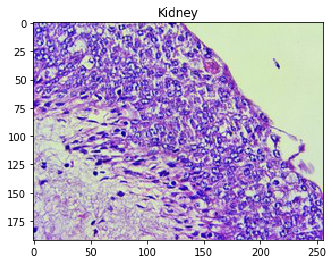

In [8]:
# Load up a Bladder image and display it. 
img_name = 'TE 1.jpg'
img = imread(os.path.join('/floyd/input/histology_data', 'Bladder', img_name))

plt.imshow(img)
plt.title('Kidney')
plt.show()

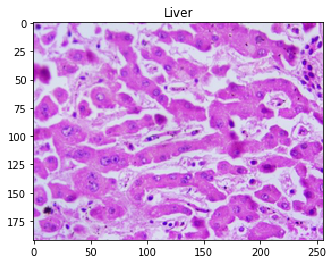

In [9]:
# Load up a Liver image and display it. 
img_name = 'Liver 2.jpg'
img = imread(os.path.join('/floyd/input/histology_data', 'Liver', img_name))

plt.imshow(img)
plt.title('Liver')
plt.show()

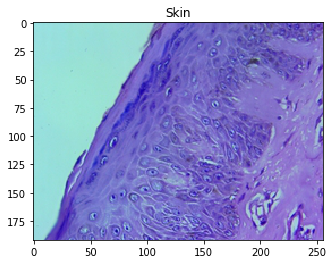

In [13]:
# Load up a Skin image and display it. 
img_name = 'Skin 9.jpg'
img = imread(os.path.join('/floyd/input/histology_data', 'Skin', img_name))

plt.imshow(img)
plt.title('Skin')
plt.show()

### What is the dimension of each image?

In [36]:
img.shape

(192, 256, 3)

## Cleaning the label strings

In [23]:
filename_csv["label"]=filename_csv["label"].apply(lambda x:x.split(","))
filename_csv["label"].head()

0    SI
1    SI
2    SI
3    SI
4    SI
Name: label, dtype: object

## Checking the label distribution

In [19]:
from collections import Counter

label_counts = Counter(filename_csv['label'].values)
pd.DataFrame(label_counts.most_common(), columns=['Part', 'Num_Samples'])

,Part,Num_Samples
0,SI,11
1,Bladder,11
2,Lung,11
3,Kidney,10
4,Brain,10
5,Liver,10
6,LI,9
7,Skin,8


## Shuffling the order of the data points so as to ensure an unbiased model training

In [24]:
from sklearn.utils import shuffle

filename_csv = shuffle(filename_csv)

In [25]:
filename_csv[:10]

,filename,label
62,Liver 1.jpg,Liver
36,TE 4.jpg,Bladder
60,Cerebrum 3.jpg,Brain
17,Skin 7.jpg,Skin
41,Lung 6.jpg,Lung
12,Skin 4.jpg,Skin
27,Kidney 3.jpg,Kidney
15,Skin 8.jpg,Skin
40,Lung 8.jpg,Lung
2,SI10.jpg,SI


## More directory exploration

In [20]:
!ls /floyd/input/histology_data/pool

Cerebrum 1.jpg	 Kidney 4.jpg  LI8.jpg	     Lung 2.jpg  SI5.jpg     TE 10.jpg
Cerebrum 10.jpg  Kidney 5.jpg  Liver 1.jpg   Lung 3.jpg  SI6.jpg     TE 11.jpg
Cerebrum 2.jpg	 Kidney 6.jpg  Liver 10.jpg  Lung 4.jpg  SI7.jpg     TE 2.jpg
Cerebrum 3.jpg	 Kidney 7.jpg  Liver 2.jpg   Lung 5.jpg  SI8.jpg     TE 3.jpg
Cerebrum 4.jpg	 Kidney 8.jpg  Liver 3.jpg   Lung 6.jpg  SI9.jpg     TE 4.jpg
Cerebrum 5.jpg	 Kidney 9.jpg  Liver 4.jpg   Lung 7.jpg  Skin 1.jpg  TE 5.jpg
Cerebrum 6.jpg	 LI1.jpg       Liver 5.jpg   Lung 8.jpg  Skin 2.jpg  TE 6.jpg
Cerebrum 7.jpg	 LI11.jpg      Liver 6.jpg   Lung 9.jpg  Skin 3.jpg  TE 7.jpg
Cerebrum 8.jpg	 LI2.jpg       Liver 7.jpg   SI1.jpg	 Skin 4.jpg  TE 8.jpg
Cerebrum 9.jpg	 LI3.jpg       Liver 8.jpg   SI10.jpg	 Skin 5.jpg  TE 9.jpg
Kidney 1.jpg	 LI4.jpg       Liver 9.jpg   SI11.jpg	 Skin 7.jpg
Kidney 10.jpg	 LI5.jpg       Lung 1.jpg    SI2.jpg	 Skin 8.jpg
Kidney 2.jpg	 LI6.jpg       Lung 10.jpg   SI3.jpg	 Skin 9.jpg
Kidney 3.jpg	 LI7.jpg       Lung 11.jpg   SI4

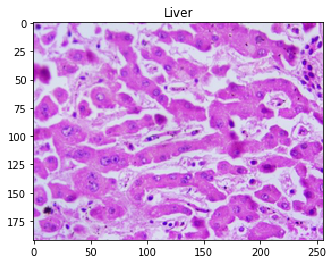

In [22]:
# Load up a Liver image and display it. 
img_name = 'Liver 2.jpg'
img = imread(os.path.join('/floyd/input/histology_data', 'pool', img_name))

plt.imshow(img)
plt.title('Liver')
plt.show()

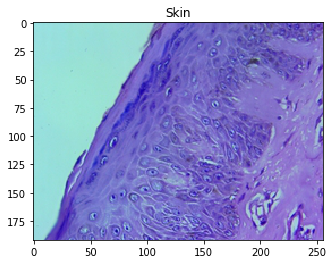

In [21]:
# Load up a Skin image and display it. 
img_name = 'Skin 9.jpg'
img = imread(os.path.join('/floyd/input/histology_data', 'pool', img_name))

plt.imshow(img)
plt.title('Skin')
plt.show()

> **It seems that the `pool` folder contains all the necessary training images.**

## Time to preapre the training data and then splitting it 

> Machine understands only numbers

In [41]:
# Define the class labels separately for convenience
classes=["Bladder","LI","Lung","Skin","Stomach","Brain","Kidney","Liver","SI","Sk muscle"]

In [26]:
from scipy.misc import imresize
import numpy as np

# Uniforming the precision to half sp as to speed up the training (NVIDIA inspired)
temp = []
for img_name in filename_csv.filename:
    img_path = os.path.join('/floyd/input/histology_data', 'pool', img_name)
    img = imread(img_path)
    img = imresize(img, (256,192))
    img = img.astype('float32') 
    temp.append(img)

X = np.stack(temp)

In [27]:
X.shape

(80, 256, 192, 3)

## Normalize the image pixels

In [36]:
X = X/255.

In [74]:
filename_csv['label'][55:69].unique()

array(['Kidney', 'Brain', 'SI', 'Liver', 'Skin', 'Lung', 'LI'],
      dtype=object)

## Splitting into train/validation/test sets (according to Dr. Sanyal's original split ratios)

In [37]:
X_train, X_valid, X_test = X[0:54], X[55:69], X[70:79]

In [67]:
X_train.shape, X_valid.shape, X_test.shape

((54, 256, 192, 3), (14, 256, 192, 3), (9, 256, 192, 3))

### Label encode the images

In [68]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y_train = lb.fit_transform(filename_csv['label'][0:54])
y_train = keras.utils.np_utils.to_categorical(y_train)

y_valid = lb.fit_transform(filename_csv['label'][55:69])
y_valid = keras.utils.np_utils.to_categorical(y_valid)

y_test = lb.fit_transform(filename_csv['label'][70:79])
y_test = keras.utils.np_utils.to_categorical(y_test)

In [69]:
y_train.shape, y_valid.shape, y_test.shape

((54, 8), (14, 7), (9, 7))

## Load up more libraries

In [39]:
from keras.preprocessing.image import ImageDataGenerator

# From PyImageSearch's Adrian Rosebrock
from resnet import ResNet

## Construct image generators for data augmentation (not much data we have for a deep network)

In [45]:
train_aug = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

val_aug = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_aug = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

## Employ the generators to fit

In [54]:
train_aug.fit(X_train)
val_aug.fit(X_valid)
test_aug.fit(X_test)

## Define a learning rate schedule

> More advanced methods can be experimented with (CLR, Learning Rate Annealing with Cosine, AdamW).

In [46]:
NUM_EPOCHS = 128
INIT_LR = 1e-1
BS = 32
def poly_decay(epoch):
    maxEpochs = NUM_EPOCHS
    baseLR = INIT_LR
    power = 1.0
 
    alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
 
    # return the new learning rate
    return alpha

## Model building and training

In [70]:
# Initialize our ResNet model
model = ResNet.build(192, 256, 3, 8, (3, 4, 6),
                    (16, 32, 64, 128), reg=0.0005)

In [64]:
# Define the optimizer (other variants are also needed to be tried)
from keras.optimizers import SGD
opt = SGD(lr=INIT_LR, momentum=0.9)

In [72]:
# Compile the model to optimize the categorical_crossentropy as the loss function
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

## Defining the callbacks to speedup training and also for visualization

In [57]:
from keras.callbacks import EarlyStopping, TensorBoard, LearningRateScheduler

callbacks = [EarlyStopping(monitor='val_loss', patience=2), \
             TensorBoard(log_dir='./logs'), \
             LearningRateScheduler(poly_decay)]

In [ ]:
H = model.fit(X_train, y_train, batch_size=BS,epochs=NUM_EPOCHS,verbose=1, callbacks=callbacks)

> I cleared this above cell's output intentionally as I don't want my readers to scram through 128 epochs of less human-friendly data.

## Visualizing model performance

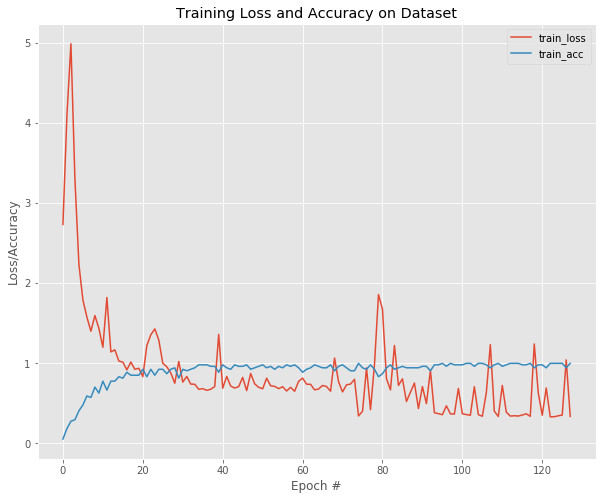

In [78]:
plt.style.use("ggplot")
plt.figure(figsize=(10,8))
plt.plot(np.arange(0, 128), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 128), H.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

## Consider reading this while reviewing the code!

- The _image generators_ do not have much significance in the training because of the way I followed for training the Network. 

- I used the class fit and predict constructs for the purpose. But that will result in an error as there are 8 different classes in the training set and 7 different classes for the validation and test sets. Instead, I will try the *fit_generator* constructs to address this problem. 

- I defined the _EarlyStopping_ callback to stop the training in between the epochs if the validation accuracy does not improve up to a specified threshold. But since I did not use the validation data in the training (same dimension mismatch issue) it is of no use. But it would be effective once I retrain the model using the fit_generator construct. Other two callbacks viz. LearningRateDecay and TensorBoard were good. 